In [1]:
#Importa bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

### Parâmetros
Considere um cubo de 3x3x3cm.
Os seguintes parâmetros são relevantes para a análise: transferencia convectiva do ar, 
temperatura ambiente, calor latente do gelo, calor específico da água, densidade e condutividade térmica da superfície de porcelana:


In [2]:
Har = 20        # W/m2
Ta = 19+273     # K 
Lagua = 80*4200 # J/kg
C = 1*4200      # J/kg.K
D = 1e3         # kg/m3 
kp = 3          # W/mK
d = 5e-3        # m

## Modelo:

In [3]:
def modelo(x,t):
    T = x[0]      #Temperatura do gelo
    M = x[1]      #Massa do gelo
    
    l = (M/D)**(1/3) # Lado do gelo em função da massa
    A = 5*l**2       # Área do gelo em contato com o ar
    a = l**2         # Área do gelo em contato com o prato
    Qcv = Har * A * (Ta - T)
    Qcd = (kp * a)/d *(Ta - T)
    if T<273:
        dTdt = 1/(M*C) * (Qcv + Qcd)
        dMdt = 0
    else:
        dTdt = 0
        dMdt = -1/Lagua * (Qcv+Qcd)
    
    dxdt = [dTdt, dMdt]
    return dxdt

### Condições :

In [4]:
T_0 = -3+273
M_0 = 30e-3

### odeint:

In [5]:
x_0 = [T_0, M_0]

t_lista = np.arange(60*25) # 25 minutos

x = odeint(modelo,x_0,t_lista)
T = x[:,0]
M = x[:,1]

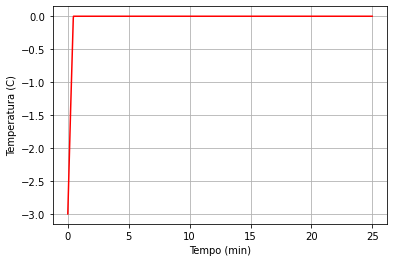

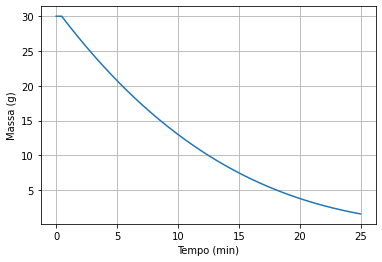

In [6]:

plt.plot(t_lista/60,T-273, 'r', label = 'Temperatura do gelo')
plt.ylabel("Temperatura (C)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.show()

plt.plot(t_lista/60,M*1e3, label = 'Massa do gelo')
plt.ylabel("Massa (g)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.show()


# Gráficos conclusivos

Agora, consideraremos  uma variação no coeficiente de condutividade térmica da superfície na qual o gelo está.
    Para isso vamos considerara uma lista de coeficientes k:
                                
                                           k = [0, 10, 20, ..., 90, 100]

In [7]:
lista_k = np.arange(0, 110, 5)

### Implementando o novo modelo 
Adicionando como argumento o coeficiente de condutividade arbitrário *k*
    

In [8]:
def modelo2(x, t, k):
    T = x[0]      #Temperatura do gelo
    M = x[1]      #Massa do gelo
    
    if M <= 0:
        dTdt = 0
        dMdt = 0
    else:
        l = (M/D)**(1/3) # Lado do gelo em função da massa
        A = 5*l**2       # Área do gelo em contato com o ar
        a = l**2         # Área do gelo em contato com o prato
        Qcv = Har * A * (Ta - T)
        Qcd = (k * a)/d *(Ta - T)
        if T<273:
            dTdt = 1/(M*C) * (Qcv + Qcd)
            dMdt = 0
        else:
            dTdt = 0
            dMdt = -1/Lagua * (Qcv+Qcd)


    
    dxdt = [dTdt, dMdt]
    return dxdt

### Gráfico de massa do gelo (g) x tempo (min)
##### variando o coeficiente de condutividade térmica (k)

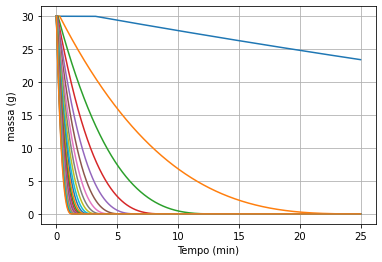

In [9]:
for k in lista_k:
    odebas = odeint(modelo2, x_0, t_lista, args=(k,), mxordn = 1)
    massas = odebas[:, 1]
    plt.plot(t_lista/60, massas*1e3, label=('k={}'.format(k)))
plt.xlabel('Tempo (min)')
plt.ylabel('massa (g)')

plt.grid(True)
plt.show()

#### função que determina o momento em que o gelo derrete completamente (m=0)

In [10]:
def massa_0(lista_m,t_lista):
    for i in range(len(lista_m)):
        if lista_m[i] <= 0.02*lista_m[0]:
            return t_lista[i]/60
            

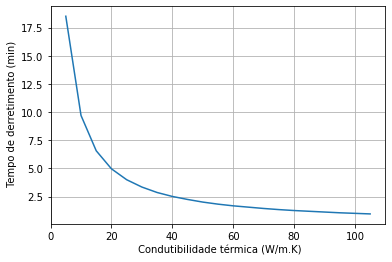

[None, 18.5, 9.7, 6.566666666666666, 4.966666666666667, 4.0, 3.35, 2.8666666666666667, 2.5166666666666666, 2.25, 2.0166666666666666, 1.8333333333333333, 1.6833333333333333, 1.5666666666666667, 1.45, 1.35, 1.2666666666666666, 1.2, 1.1333333333333333, 1.0666666666666667, 1.0166666666666666, 0.9666666666666667]


In [11]:
lista_massas_0 = []
for k in lista_k:
    odebas = odeint(modelo2, x_0, t_lista, args=(k,), mxordn = 1)
    lista_massas_0.append(massa_0(odebas[:,1],t_lista))
plt.plot(lista_k, lista_massas_0)
plt.xlabel(' Condutibilidade térmica (W/m.K)')
plt.ylabel(' Tempo de derretimento (min)')
plt.grid(True)
plt.show()
print(lista_massas_0)

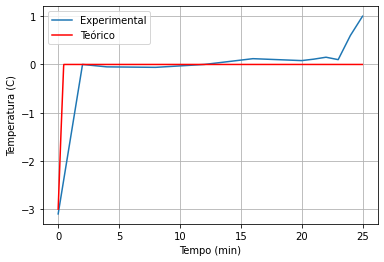

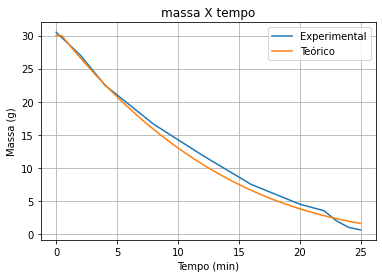

In [14]:
dadosT = [-3.1, 0,-0.05,-0.06,0,0.12,0.08,0.11,0.15,0.1,0.6,1]

dadost = [0, 2, 4, 8, 12, 16, 20, 21, 22, 23, 24, 25]
plt.plot(dadost,dadosT, '-', label = 'Experimental')
plt.plot(t_lista/60,T-273, 'r', label = 'Teórico')
plt.ylabel("Temperatura (C)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.legend()
plt.show()

dadosM = [30.5, 27, 22.5, 16.6, 11.9, 7.5, 4.5, 4, 3.5, 2, 1,0.6]
plt.plot(dadost,dadosM, '-', label = 'Experimental')
plt.title('massa X tempo')
plt.plot(t_lista/60,M*1e3, label = 'Teórico')
plt.ylabel("Massa (g)")
plt.xlabel("Tempo (min)")
plt.grid(True)
plt.legend()
plt.show()
